# Pracica Machine Learning
### Crear un modelo que prediga el precio de un airbnb a partir del dataset proporcionado
Problema de regresión. Variable objetivo = Price

In [222]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carga y primera limpieza de datos

In [769]:
# Carga de los datos
data = pd.read_csv('airbnb-listings-extract.csv', sep=';')
data.head(5)

ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in Barcelona's most chic dis...   
4  Unique apartment in vibrant neighborhoods, car...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  You wake up to the sun rising over Barcelona's...   
4  License: HUTB-005313 Charming apartment, locat...   

                                         Description Experiences Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   
2  This apartment has: 1 double bed, 1 double sof...                none   
3  Live like a local in Barcelona's most chic dis...                none   
4  Unique apartment in vibrant neighborhoods, car...                none   

                               Neighborhood Overview  ...  \
0  This neighborhood is located in the hills west...  ...   
1  Plaza   Cataluña Catalonia Square is the large...  ...   
2  Plaza   Cataluña Catalonia Square is the large...  ...   
3  We're right in the heart of the chic L'Eixampl...  ...   
4                                                NaN  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                        10.0                   10.0                10.0   
1                        10.0                    8.0                10.0   
2                         NaN                    NaN                 NaN   
3                        10.0                   10.0                 9.0   
4                         NaN                    NaN                 NaN   

       License Jurisdiction Names Cancellation Policy  \
0          NaN                NaN            moderate   
1  HUTB-006721                NaN     super_strict_30   
2  HUTB-007527                NaN     super_strict_30   
3          NaN                NaN              strict   
4          NaN                NaN            flexible   

  Calculated host listings count Reviews per Month  \
0                            1.0              3.50   
1                          106.0              0.86   
2                          106.0               NaN   
3                           24.0              1.09   
4                           92.0               NaN   

                    Geolocation  \
0  30.3373609355,-97.8632766782   
1   41.3896829422,2.17262543017   
2   41.3930345489,2.16217327868   
3    41.3969668101,2.1674178103   
4   41.3886851936,2.15514963616   

                                            Features  
0  Host Is Superhost,Host Has Profile Pic,Host Id...  
1  Host Has Profile Pic,Requires License,Instant ...  
2  Host Has Profile Pic,Requires License,Instant ...  
3  Host Has Profile Pic,Host Identity Verified,Re...  
4  Host Has Profile Pic,Host Identity Verified,Is...  

[5 rows x 89 columns]

In [770]:
first_clean = []

# Cogemos las columnas que contienen Urls
for col in data.columns:
    if 'Url' in col:
        first_clean.append(col)

#Cogemos las columnas que contienen información del Host
for col in data.columns:
    if 'Host' in col:
        first_clean.append(col)

for col in data.columns:
    if 'ID' in col:
        first_clean.append(col)

print("Primeras columnas a eliminar: ", first_clean)

Primeras columnas a eliminar:  ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'ID', 'Scrape ID', 'Host ID']


In [773]:
# Eliminamos el primer grupo de columnas (IDs y Host info)
data = data.drop(first_clean, axis=1)

In [774]:
# Eliminamos las columnas que contienen texto libre y fechas.
data = data.drop(['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                'House Rules', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'Features'], axis=1)

## Manejo de valores nulos

In [775]:
# Vamos a mirar la cantidad de nulos que tienen las variables para así terminar con la exploración prévia

null_percentage = data.isnull().mean() * 100 # hacemos la media del booleano isnull y 
#multiplicamos por 100 para conseguir el %
null_percentage_noZero = null_percentage[null_percentage != 0] # buscamos todas las variables que contengan algun nulo
null_percentage_noZero = null_percentage_noZero.round(2) # redondeamos los decimales
half_null = null_percentage[null_percentage > 50].index # filtramos las columnas que contienen mas del 50% de nulos

print(f'Columnas con mas del 50% de nulos: {list(half_null)}')
print(f'Porcentajes de nulos en columna:\n{null_percentage_noZero}')

Columnas con mas del 50% de nulos: ['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'License', 'Jurisdiction Names']
Porcentajes de nulos en columna:
Neighbourhood                     35.38
Neighbourhood Group Cleansed       6.90
City                               0.04
State                              0.97
Zipcode                            3.42
Market                             0.39
Country                            0.01
Bathrooms                          0.37
Bedrooms                           0.17
Beds                               0.33
Amenities                          1.15
Square Feet                       95.95
Price                              0.12
Weekly Price                      75.71
Monthly Price                     75.91
Security Deposit                  57.67
Cleaning Fee                      41.22
Review Scores Rating              22.35
Review Scores Accuracy            22.50
Review Scores Cleanliness         22.46
Review Scores Checkin         

In [779]:
# Eliminamos las variables con mas del 50% de nulos 
data = data.drop(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'License', 'Jurisdiction Names'], axis=1)

## Imputación de datos

In [780]:
# Haremos imputación de variables NUMERICAS con la moda

num_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace = True)

print("Valores nulos después de la imputación con moda:")
print(data.select_dtypes(include=['float64', 'int64']).isnull().sum())


Valores nulos después de la imputación con moda:
Latitude                          0
Longitude                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Price                             0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
Reviews per Month                 0
dtype: int64


In [781]:
# Imputación variables CATEGÓRICAS con moda

cat_columns = data.select_dtypes(include=['object']).columns

for col in cat_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace = True)

print("Valores nulos después de la imputación con moda:")
print(data.select_dtypes(include=['object']).isnull().sum())


Valores nulos después de la imputación con moda:
Experiences Offered             0
Street                          0
Neighbourhood                   0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
City                            0
State                           0
Zipcode                         0
Market                          0
Smart Location                  0
Country Code                    0
Country                         0
Property Type                   0
Room Type                       0
Bed Type                        0
Amenities                       0
Cancellation Policy             0
Geolocation                     0
dtype: int64


In [384]:
data.select_dtypes(include=['object']).head(2)

Experiences Offered                                             Street  \
0                none  Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
1                none           Madrid, Comunidad de Madrid 28012, Spain   

  Neighbourhood Neighbourhood Cleansed Neighbourhood Group Cleansed    City  \
0     Jerónimos              Jerónimos                       Retiro  Madrid   
1      Malasaña                    Sol                       Centro  Madrid   

                 State Zipcode  Market Smart Location Country Code Country  \
0  Comunidad de Madrid   28014  Madrid  Madrid, Spain           ES   Spain   
1  Comunidad de Madrid   28012  Madrid  Madrid, Spain           ES   Spain   

  Property Type        Room Type  Bed Type  \
0     Apartment  Entire home/apt  Real Bed   
1     Apartment  Entire home/apt  Real Bed   

                                           Amenities Cancellation Policy  \
0  TV,Internet,Wireless Internet,Air conditioning...            moderate   
1  TV,Internet,Wireless Internet,Air conditioning...            flexible   

                    Geolocation  
0  40.4077318793,-3.68481869733  
1  40.4158022422,-3.70534037765

In [539]:
data.select_dtypes(include=['object']).columns

Index(['Experiences Offered', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Cancellation Policy', 'Geolocation'],
      dtype='object')

## Separación datos con train_test_split

In [761]:
from sklearn.model_selection import train_test_split

# lo primero que hacemos es separar la variable objetivo de las variables independientes
X = data.drop(['Price'], axis=1) # Todas las variables menos Price
y = data['Price'] # Price

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./dairbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
data = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 44)
Dimensiones del dataset de test: (2956, 44)


## Codificación de variables categóricas con One-Hot-Encoding

* Para **Amenities** voy a usar Count Encoding. Se que pierdo información específica pero no quiero usar One-Hot-Encoding ya que me va generar muchas variables nuevas y augmentará mucho la dimensionalidad.

* Para **Property Type, Room Type, Bed Type, Experiences Offered, Cancellation Policy** voy a usar Label Encoding. 

* Para **Street, Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed, City, State, Zipcode, Market, Smart Location, Country Code y Country** voy a usar Target Encoding ya que nos permite relacionar la variable con la variable objetivo y reducir dimensionalidad.

Antes de codificar hago el test de Chi Cuadrado para evaluar la relación entre las variables categóricas y la variable objetivo y así evitar codificar variables sin asociación significativa.

In [656]:
from scipy.stats import chi2_contingency

data['Price_Category'] = pd.qcut(data['Price'], q=4, labels=False) 

chi2_results = []

for col in data.select_dtypes(include=['object']).columns:
    contingency_table = pd.crosstab(data[col], data['Price_Category'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append((col, chi2, p))

chi2_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi2', 'P-Value'])
print(chi2_df.sort_values(by='P-Value'))


                        Variable          Chi2        P-Value
3         Neighbourhood Cleansed   4381.534774   0.000000e+00
4   Neighbourhood Group Cleansed   1959.107732   0.000000e+00
13                     Room Type   6414.377104   0.000000e+00
7                        Zipcode   4065.053381  1.106133e-213
1                         Street   7186.308671  1.286425e-148
8                         Market   1000.134955  2.283509e-137
6                          State   1327.583216  5.462730e-137
2                  Neighbourhood   2592.819290  1.444741e-131
16           Cancellation Policy    606.998031  5.394783e-115
5                           City   1668.593186   4.719378e-88
9                 Smart Location   1708.115457   3.071653e-87
12                 Property Type    475.430552   5.982753e-66
11                       Country    308.919285   8.293460e-40
10                  Country Code    311.946149   3.763349e-39
15                     Amenities  32026.995509   3.510951e-13
14      

In [657]:
#Vemos que Geolocation no tiene un efecto significativo en el precio así que la eliminamos
data = data.drop('Geolocation', axis=1)

### Count Encoding

In [658]:
## COUNT ENCODING

data['Amenities'] = data['Amenities'].str.replace(" ", "").str.lower()

data['Amenities_Count'] = data['Amenities'].str.split(',').apply(lambda x: len(set(x)))

data = data.drop('Amenities', axis=1)

print("DataFrame después de la limpieza y el conteo de amenities:")
print(data['Amenities_Count'].head())

DataFrame después de la limpieza y el conteo de amenities:
0    13
1    18
2    25
3     5
4    15
Name: Amenities_Count, dtype: int64


### Label Encoding

In [659]:
## LABEL ENCODING

import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Lista de columnas a codificar
columns_to_encode = [
    'Property Type', 
    'Room Type', 
    'Bed Type', 
    'Experiences Offered', 
    'Cancellation Policy'
]

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

print("DataFrame después de aplicar Label Encoding:")
print(data[columns_to_encode].head())


DataFrame después de aplicar Label Encoding:
   Property Type  Room Type  Bed Type  Experiences Offered  \
0              0          0         4                    2   
1              0          0         4                    2   
2              0          2         4                    2   
3              0          1         4                    2   
4              0          1         4                    2   

   Cancellation Policy  
0                    2  
1                    0  
2                    2  
3                    4  
4                    4  


### Target Encoding

In [660]:
### TARGET ENCODING

target_variable = 'Price' 

columns_to_target_encode = [
    'Street', 
    'Neighbourhood', 
    'Neighbourhood Cleansed', 
    'Neighbourhood Group Cleansed', 
    'City', 
    'State', 
    'Zipcode', 
    'Market', 
    'Smart Location', 
    'Country Code', 
    'Country'
]


for column in columns_to_target_encode:
    # Calcula la media de la variable objetivo para cada categoría
    mean_target = data.groupby(column)[target_variable].mean()
    # Crea una nueva columna en el DataFrame con la media correspondiente
    data[column] = data[column].map(mean_target)

print(data.head())


   Experiences Offered      Street  Neighbourhood  Neighbourhood Cleansed  \
0                    2  126.482759     112.162791              104.600000   
1                    2   59.727700      74.083883               85.710220   
2                    2   35.358974      39.898089               37.074074   
3                    2   59.727700      74.083883               60.700405   
4                    2   32.000000      56.986301               56.000000   

   Neighbourhood Group Cleansed       City      State    Zipcode     Market  \
0                     70.002809  66.248888  66.817876  83.679208  67.793812   
1                     81.061910  66.248888  66.817876  68.614750  67.793812   
2                     39.716263  66.248888  66.817876  38.073684  67.793812   
3                     81.061910  66.248888  66.817876  68.614750  67.793812   
4                     72.640992  66.248888  85.500000  61.730689  67.793812   

   Smart Location  ...  Review Scores Cleanliness  Review Scor

## Análisis de varianza con ANOVA

Realizamos un análisis de varianza con Anova para **evaluar la relación entre las características y la variable objetivo (Price)** para poder identificar qué variables son significativas para predecir el precio.

In [662]:
from sklearn.feature_selection import f_classif
import pandas as pd

X = data.drop('Price', axis=1)  # Características
y = data['Price']  # Variable objetivo

f_values, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

significant_features = anova_results[anova_results['P-Value'] < 0.05]
non_significant_features = anova_results[anova_results['P-Value'] >= 0.05]

variables_to_remove = non_significant_features['Feature'].tolist()
num_variables_to_remove = len(variables_to_remove)
print(f"Número total de variables a eliminar: {num_variables_to_remove}")
print("Variables a eliminar (no significativas):")
print(non_significant_features[['Feature', 'P-Value']])


Número total de variables a eliminar: 2
Variables a eliminar (no significativas):
           Feature   P-Value
20        Bed Type  0.999984
25  Maximum Nights  1.000000


In [664]:
# Eliminamos las variables que NO tiene relación con la variable objetivo
data = data.drop(columns=variables_to_remove, errors='ignore')  

In [485]:
data.head(5)

Experiences Offered      Street  Neighbourhood  Neighbourhood Cleansed  \
0                    2  126.482759     112.162791              104.600000   
1                    2   59.727700      74.083883               85.710220   
2                    2   35.358974      39.898089               37.074074   
3                    2   59.727700      74.083883               60.700405   
4                    2   32.000000      56.986301               56.000000   

   Neighbourhood Group Cleansed       City      State    Zipcode     Market  \
0                     70.002809  66.248888  66.817876  83.679208  67.793812   
1                     81.061910  66.248888  66.817876  68.614750  67.793812   
2                     39.716263  66.248888  66.817876  38.073684  67.793812   
3                     81.061910  66.248888  66.817876  68.614750  67.793812   
4                     72.640992  66.248888  85.500000  61.730689  67.793812   

   Smart Location  ...  Review Scores Cleanliness  Review Scores Checkin  \
0        66.20481  ...                       10.0                   10.0   
1        66.20481  ...                        9.0                   10.0   
2        66.20481  ...                       10.0                   10.0   
3        66.20481  ...                       10.0                   10.0   
4        66.20481  ...                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                         10.0                    10.0                  9.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                 10.0   
4                         10.0                     9.0                  9.0   

   Cancellation Policy  Calculated host listings count  Reviews per Month  \
0                    2                             2.0               0.50   
1                    0                             1.0               2.43   
2                    2                            16.0               1.00   
3                    4                            97.0               1.00   
4                    4                             2.0               2.08   

   Price_Category  Amenities_Count  
0               2               13  
1               1               18  
2               0               25  
3               0                5  
4               0               15  

[5 rows x 42 columns]

## Importancia de características con Random Forest

In [668]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X = data.drop('Price', axis=1)  # Características
y = data['Price']  # Variable objetivo

model = RandomForestRegressor(random_state=42)  
model.fit(X, y)

importance = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                           Feature  Importance
39                  Price_Category    0.499116
1                           Street    0.233832
17                       Bathrooms    0.065688
20                    Cleaning Fee    0.030087
27                Availability 365    0.015061
40                 Amenities_Count    0.011844
16                    Accommodates    0.011146
18                        Bedrooms    0.010882
12                        Latitude    0.010020
13                       Longitude    0.010016
3           Neighbourhood Cleansed    0.008754
26                 Availability 90    0.008210
25                 Availability 60    0.006903
23                  Minimum Nights    0.006812
2                    Neighbourhood    0.006369
38               Reviews per Month    0.006126
28               Number of Reviews    0.006097
7                          Zipcode    0.005142
19                            Beds    0.004894
22                    Extra People    0.004885
37  Calculate

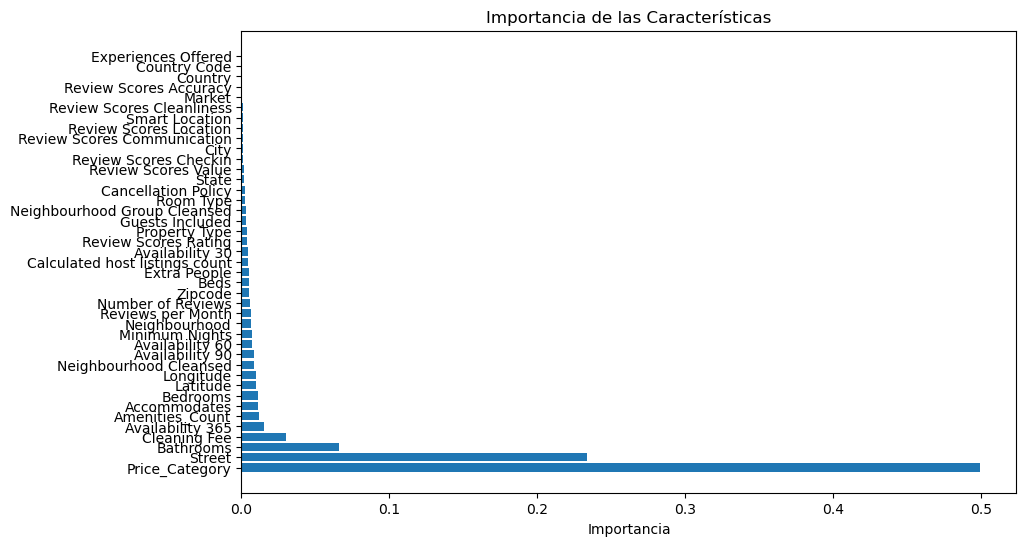

In [673]:
import matplotlib.pyplot as plt

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()


### Observaciones:
Vemos que las variables con características irrelevantes son **Experiences Offered, Country y Country Code**, mientras que **Street** tiene una fuerte relevancia.

In [674]:
data = data.drop(['Experiences Offered', 'Country', 'Country Code'], axis=1)

## Correlación


Price                             1.000000
Street                            0.702195
Price_Category                    0.661559
Smart Location                    0.545417
City                              0.540169
Accommodates                      0.526017
Zipcode                           0.510818
Neighbourhood Cleansed            0.506371
Bedrooms                          0.489327
State                             0.475319
Cleaning Fee                      0.445881
Beds                              0.435225
Neighbourhood                     0.378642
Bathrooms                         0.375025
Market                            0.342594
Guests Included                   0.294535
Neighbourhood Group Cleansed      0.244072
Calculated host listings count    0.223933
Amenities_Count                   0.177088
Cancellation Policy               0.145440
Availability 30                   0.105940
Review Scores Location            0.098713
Extra People                      0.092211
Review Scor

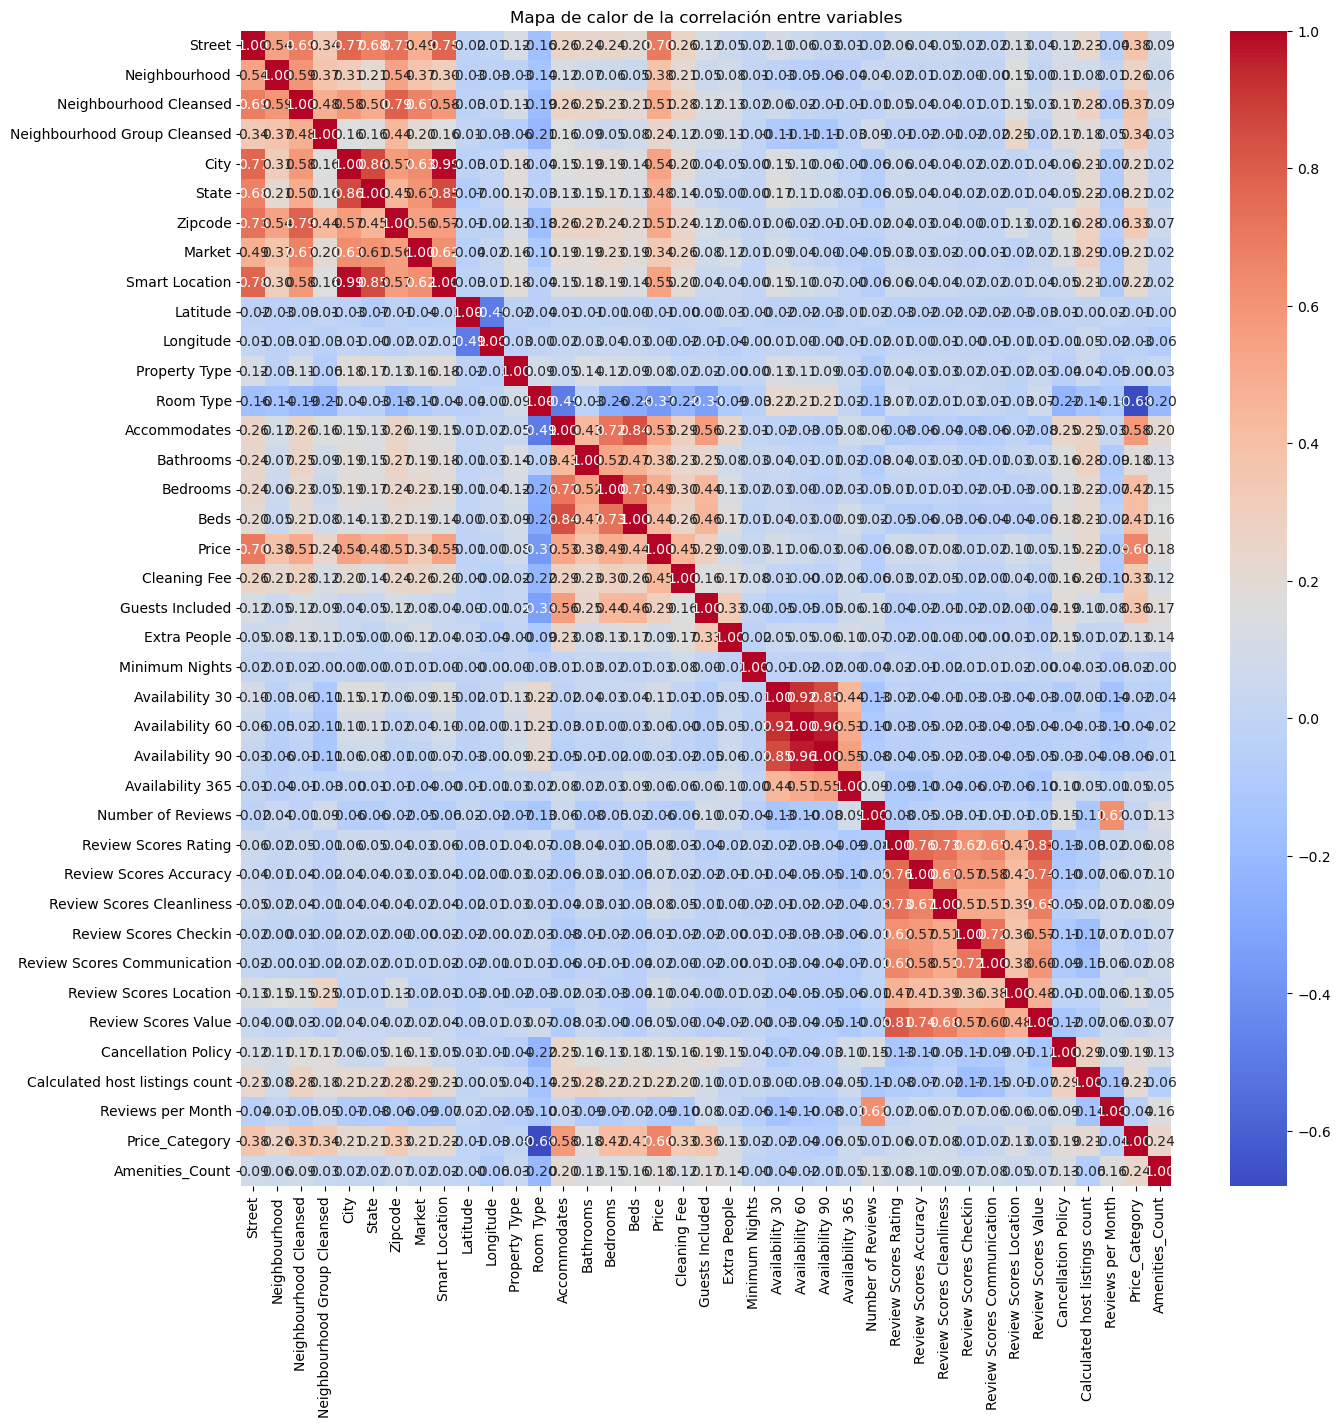

In [675]:
correlation_matrix = data.corr()
# hacemos la correlacion de las variables
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)


plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

### Observaciones

Street, Smart Location, Accommodates, Cleaning Fee y Beds vemos que tienen una correlación alta con Price mientras que Number of Reviews y Reviews per Month tienen una relación negativa. 

Observando los datos también veo muchas variables redundantes que voy a aprovechar para eliminar a continuación, como Neighbourhood Cleansed y Neighbourhood Group Cleansed, etc. Primero voy a usar un umbral de correlación para decidir cuales conservar. 

In [676]:
# Filtrar variables con correlación superior a 0.5 con el precio
correlated_features = data.corr()['Price'][data.corr()['Price'].abs() > 0.5].index.tolist()
print("Variables altamente correlacionadas con el precio:", correlated_features)


Variables altamente correlacionadas con el precio: ['Street', 'Neighbourhood Cleansed', 'City', 'Zipcode', 'Smart Location', 'Accommodates', 'Price', 'Price_Category']


In [677]:
# Lista de variables a eliminar basadas en el análisis
variables_to_remove = [
    'Room Type',
    'Number of Reviews',
    'Reviews per Month',
    'Review Scores Rating',
    'Review Scores Accuracy',
    'Review Scores Communication',
    'Review Scores Checkin',
    'Neighbourhood', 
    'Neighbourhood Group Cleansed',
    'Property Type',
    'Cancellation Policy'
]

# Eliminar las variables del DataFrame
data = data.drop(columns=variables_to_remove)

# Verificar las columnas restantes
print("Columnas restantes después de eliminar variables:")
print(data.columns)


Columnas restantes después de eliminar variables:
Index(['Street', 'Neighbourhood Cleansed', 'City', 'State', 'Zipcode',
       'Market', 'Smart Location', 'Latitude', 'Longitude', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Price_Category', 'Amenities_Count'],
      dtype='object')


## Visualización datos

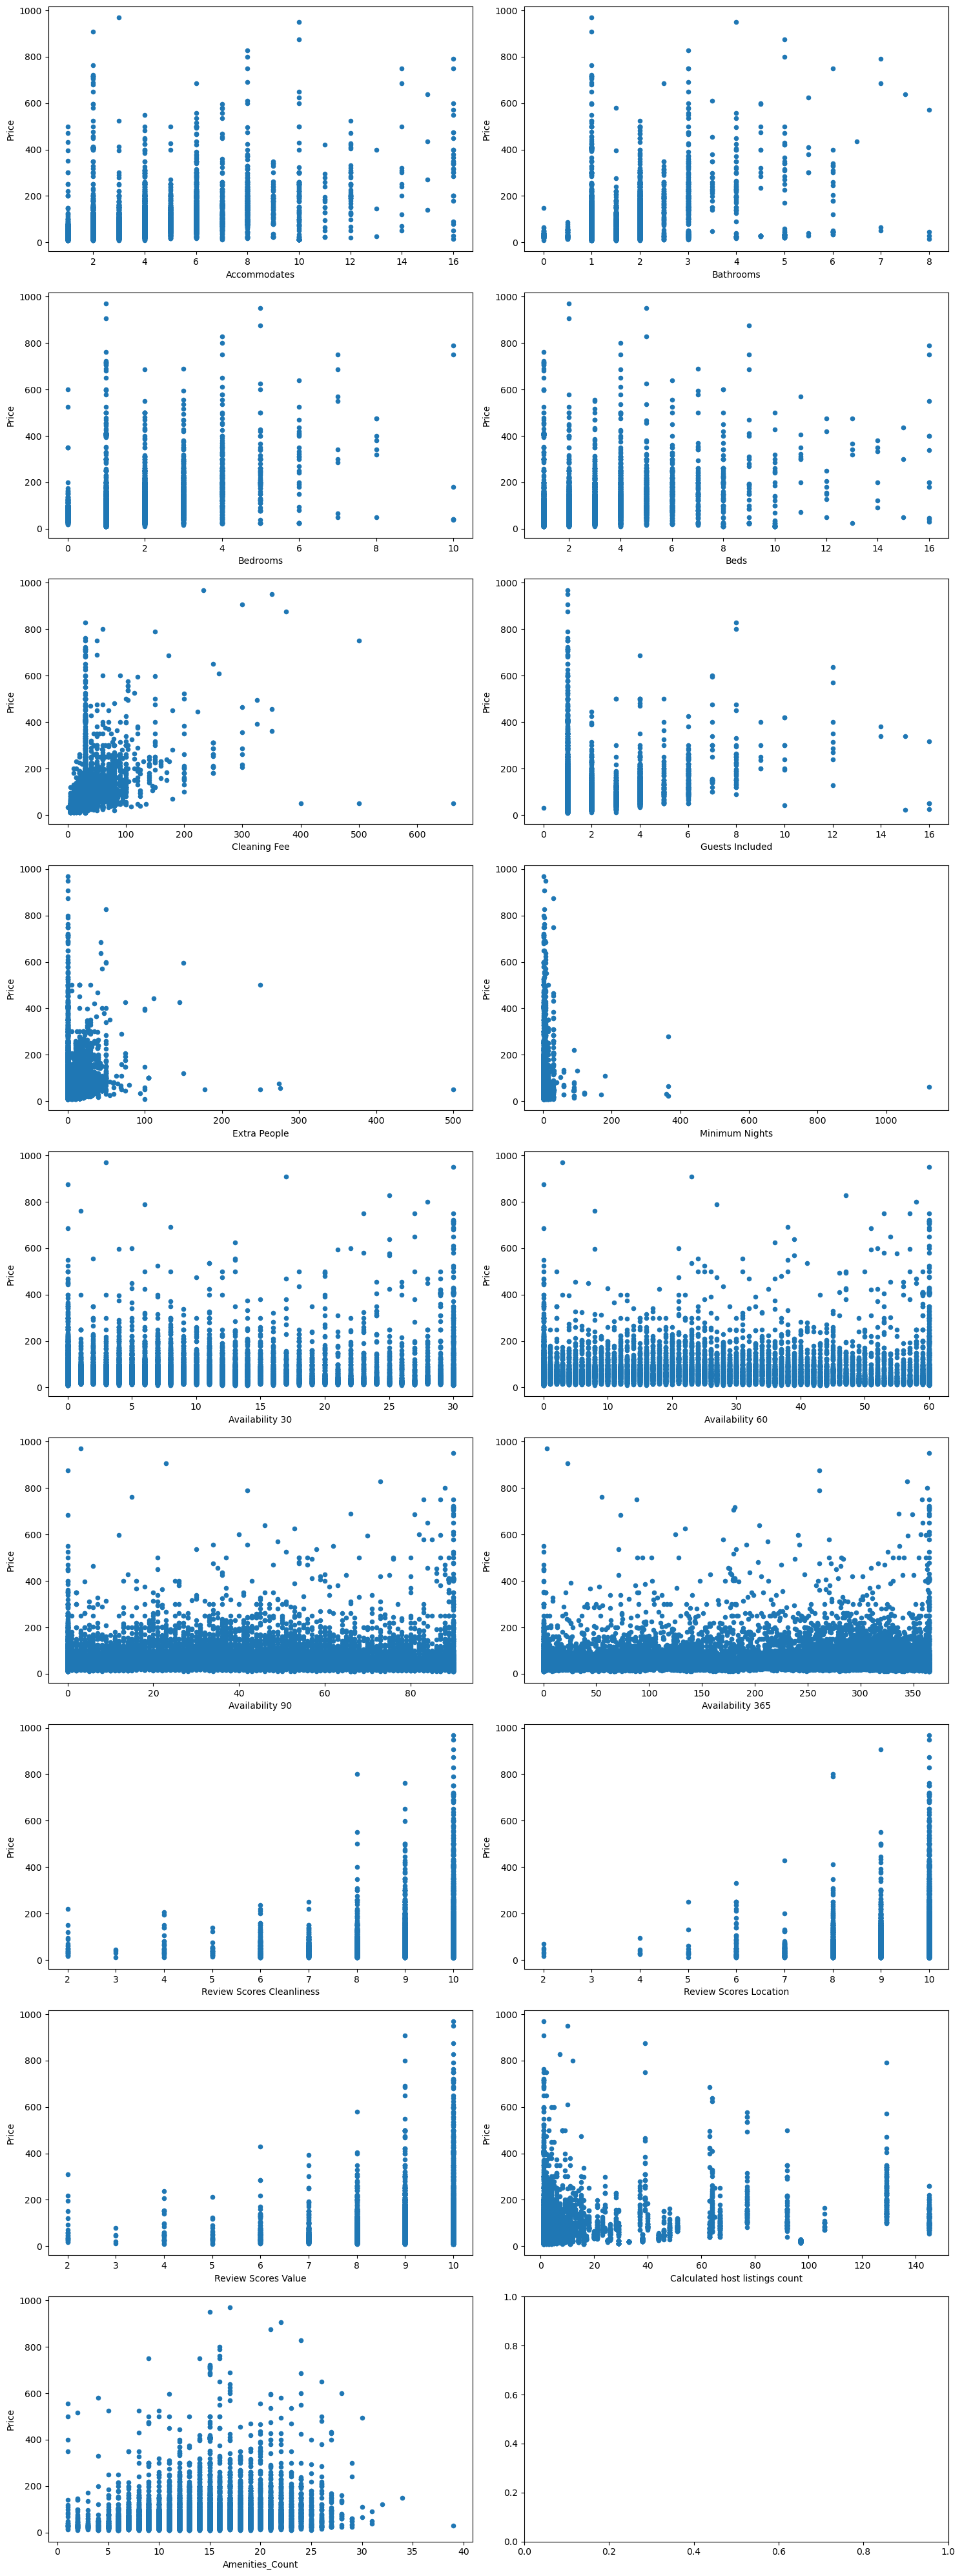

In [592]:

variables = ['Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count', 'Amenities_Count']


fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 40)) 

axes = axes.flatten()

for i, var in enumerate(variables):
    data.plot(kind='scatter', x=var, y='Price', ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')

plt.tight_layout()

plt.show()


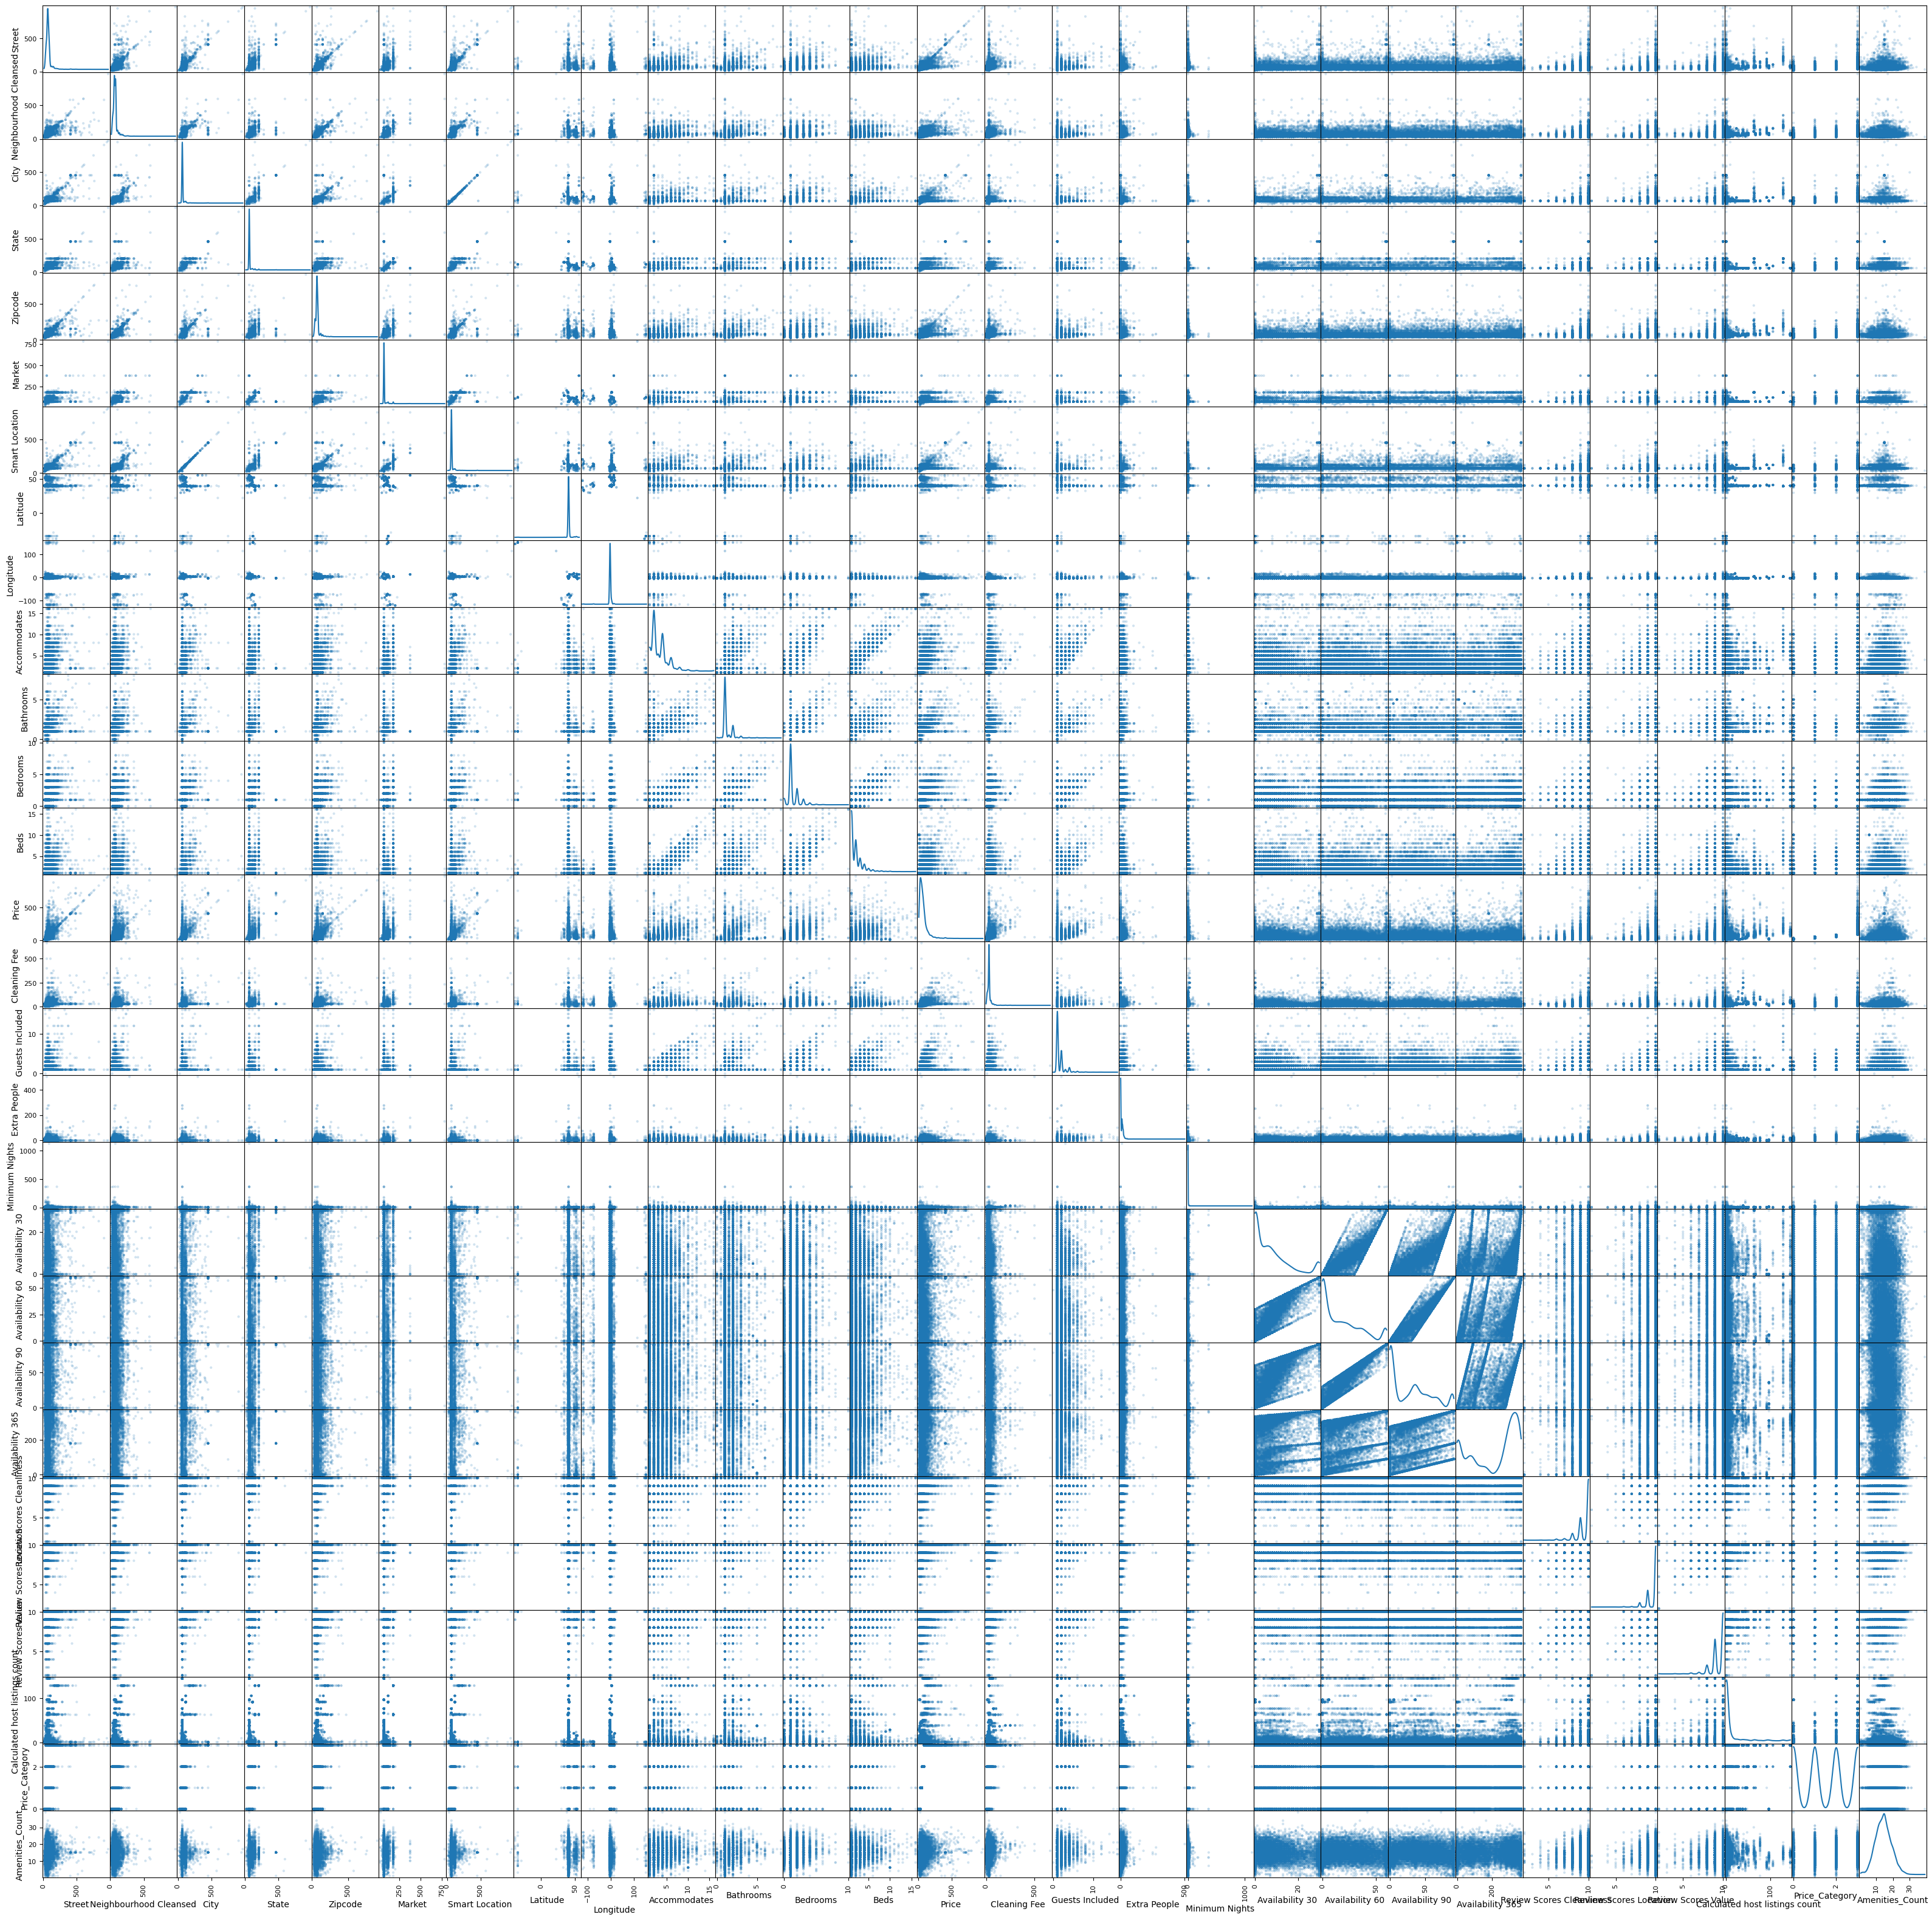

In [577]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(40, 40), diagonal = 'kde')
plt.show()

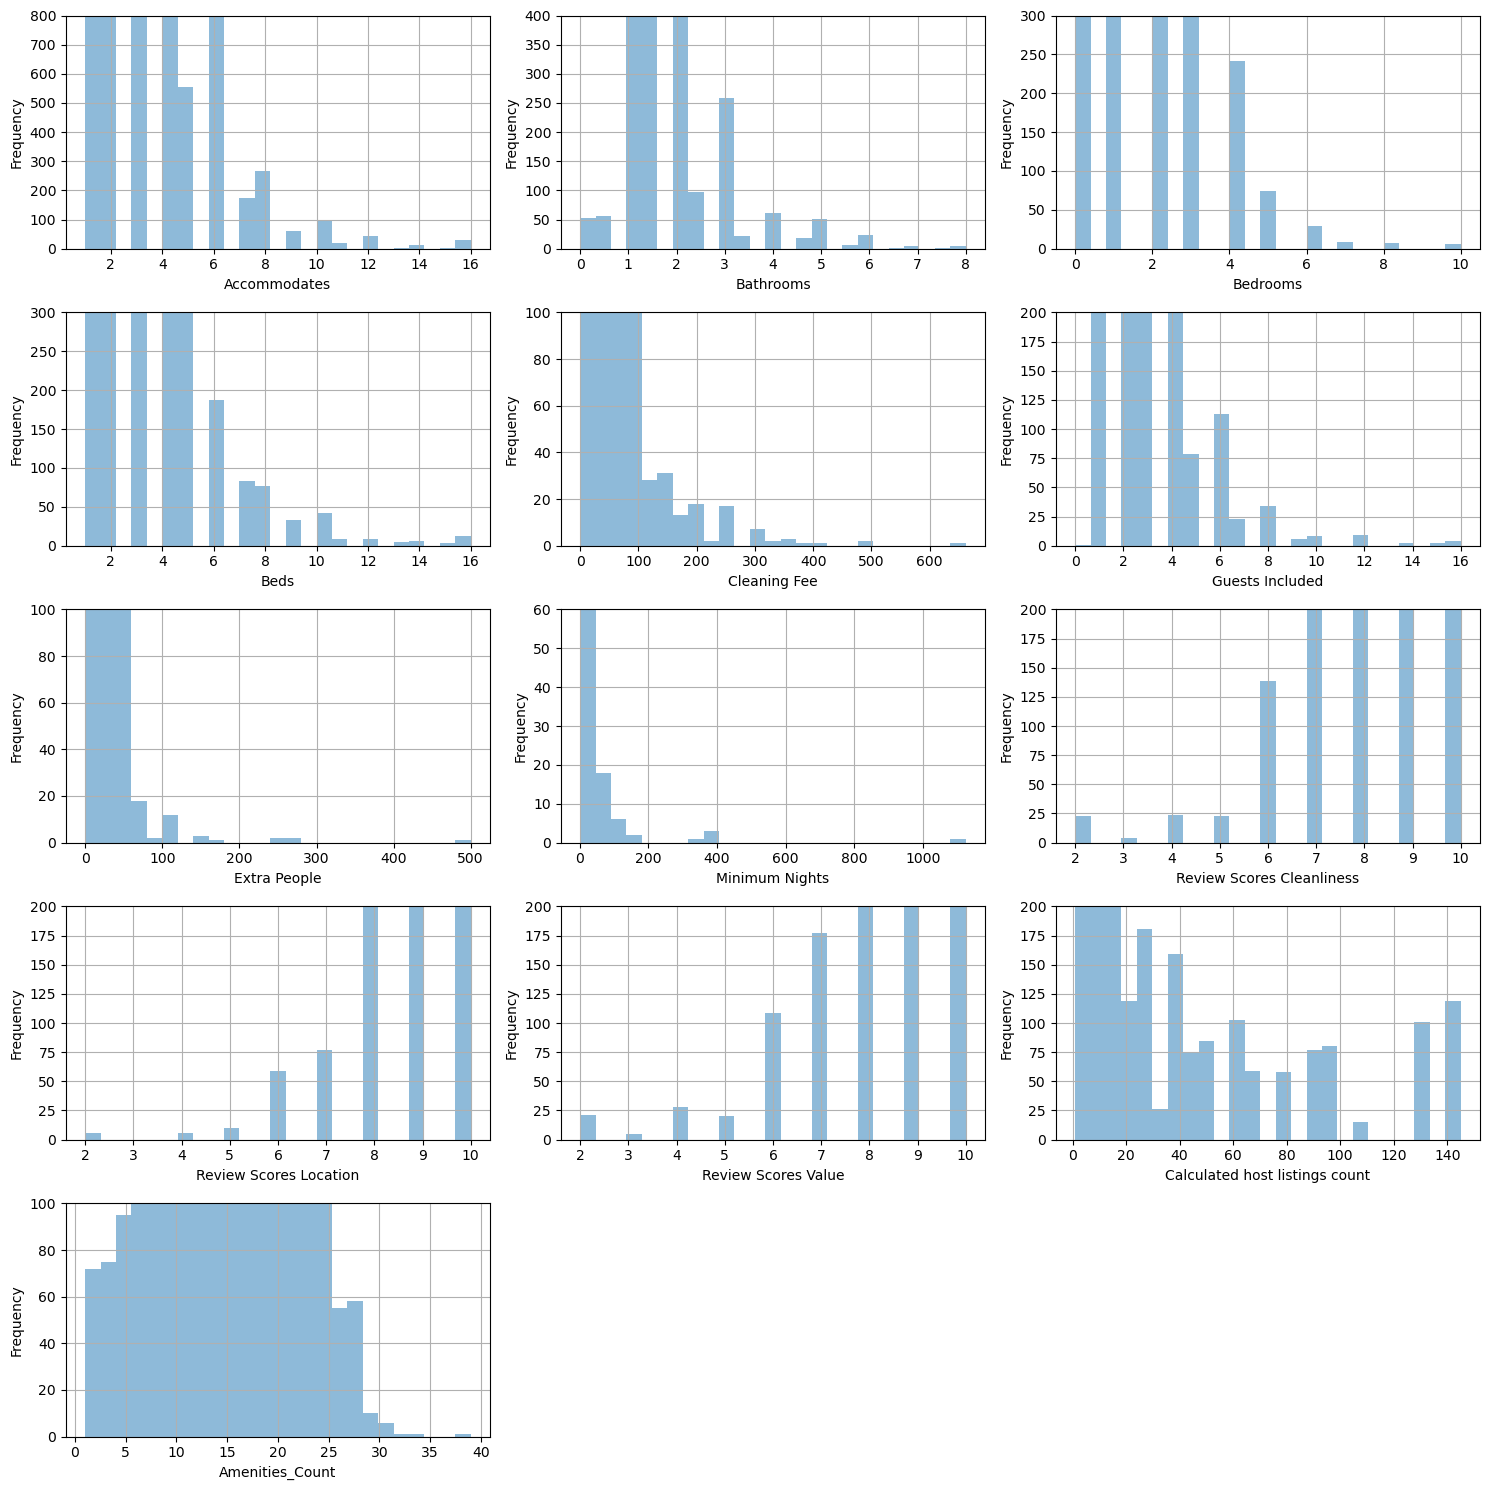

In [628]:
plt.figure(figsize=(15, 15))  # Aumentar el tamaño de la figura para mejor visualización

# Primer fila
plt.subplot(5, 3, 1)
data['Accommodates'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 800)
plt.xlabel('Accommodates')

plt.subplot(5, 3, 2)
data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 400)
plt.xlabel('Bathrooms')

plt.subplot(5, 3, 3)
data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 300)
plt.xlabel('Bedrooms')

# Segunda fila
plt.subplot(5, 3, 4)
data['Beds'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 300)
plt.xlabel('Beds')

plt.subplot(5, 3, 5)
data['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 100)
plt.xlabel('Cleaning Fee')

plt.subplot(5, 3, 6)
data['Guests Included'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 200)
plt.xlabel('Guests Included')

# Tercera fila
plt.subplot(5, 3, 7)
data['Extra People'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 100)
plt.xlabel('Extra People')

plt.subplot(5, 3, 8)
data['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 60)
plt.xlabel('Minimum Nights')

plt.subplot(5, 3, 9)
data['Review Scores Cleanliness'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 200)
plt.xlabel('Review Scores Cleanliness')

#Cuarta fila
plt.subplot(5, 3, 10)
data['Review Scores Location'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 200)
plt.xlabel('Review Scores Location')

plt.subplot(5, 3, 11)
data['Review Scores Value'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 200)
plt.xlabel('Review Scores Value')

plt.subplot(5, 3, 12)
data['Calculated host listings count'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 200)
plt.xlabel('Calculated host listings count')

plt.subplot(5, 3, 13)
data['Amenities_Count'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 100)
plt.xlabel('Amenities_Count')


plt.tight_layout() 
plt.show()

## Regularización Outliers

Analizando la visualización anterior, vemos que tenemos algún que otro outlier, entre ellos podemos destacar:
* Extra people.
* Minimum nights.
* Cleaning Fee.

In [691]:
data = data[data['Accommodates'] <= 8.5]

data = data[data['Bathrooms'] <= 3.5]

data = data[data['Bedrooms'] <= 5]

data = data[data['Beds'] <= 8]

data = data[data['Cleaning Fee'] <= 120]

data = data[(data['Guests Included'] <= 7) & (data['Guests Included'] > 0)]

data = data[data['Extra People'] <= 50]

data = data[data['Minimum Nights'] <= 35]

data = data[data['Review Scores Cleanliness'] >= 4]

data = data[data['Review Scores Location'] >= 5]

data = data[data['Review Scores Value'] >= 5]

data = data[data['Amenities_Count'] <= 30]



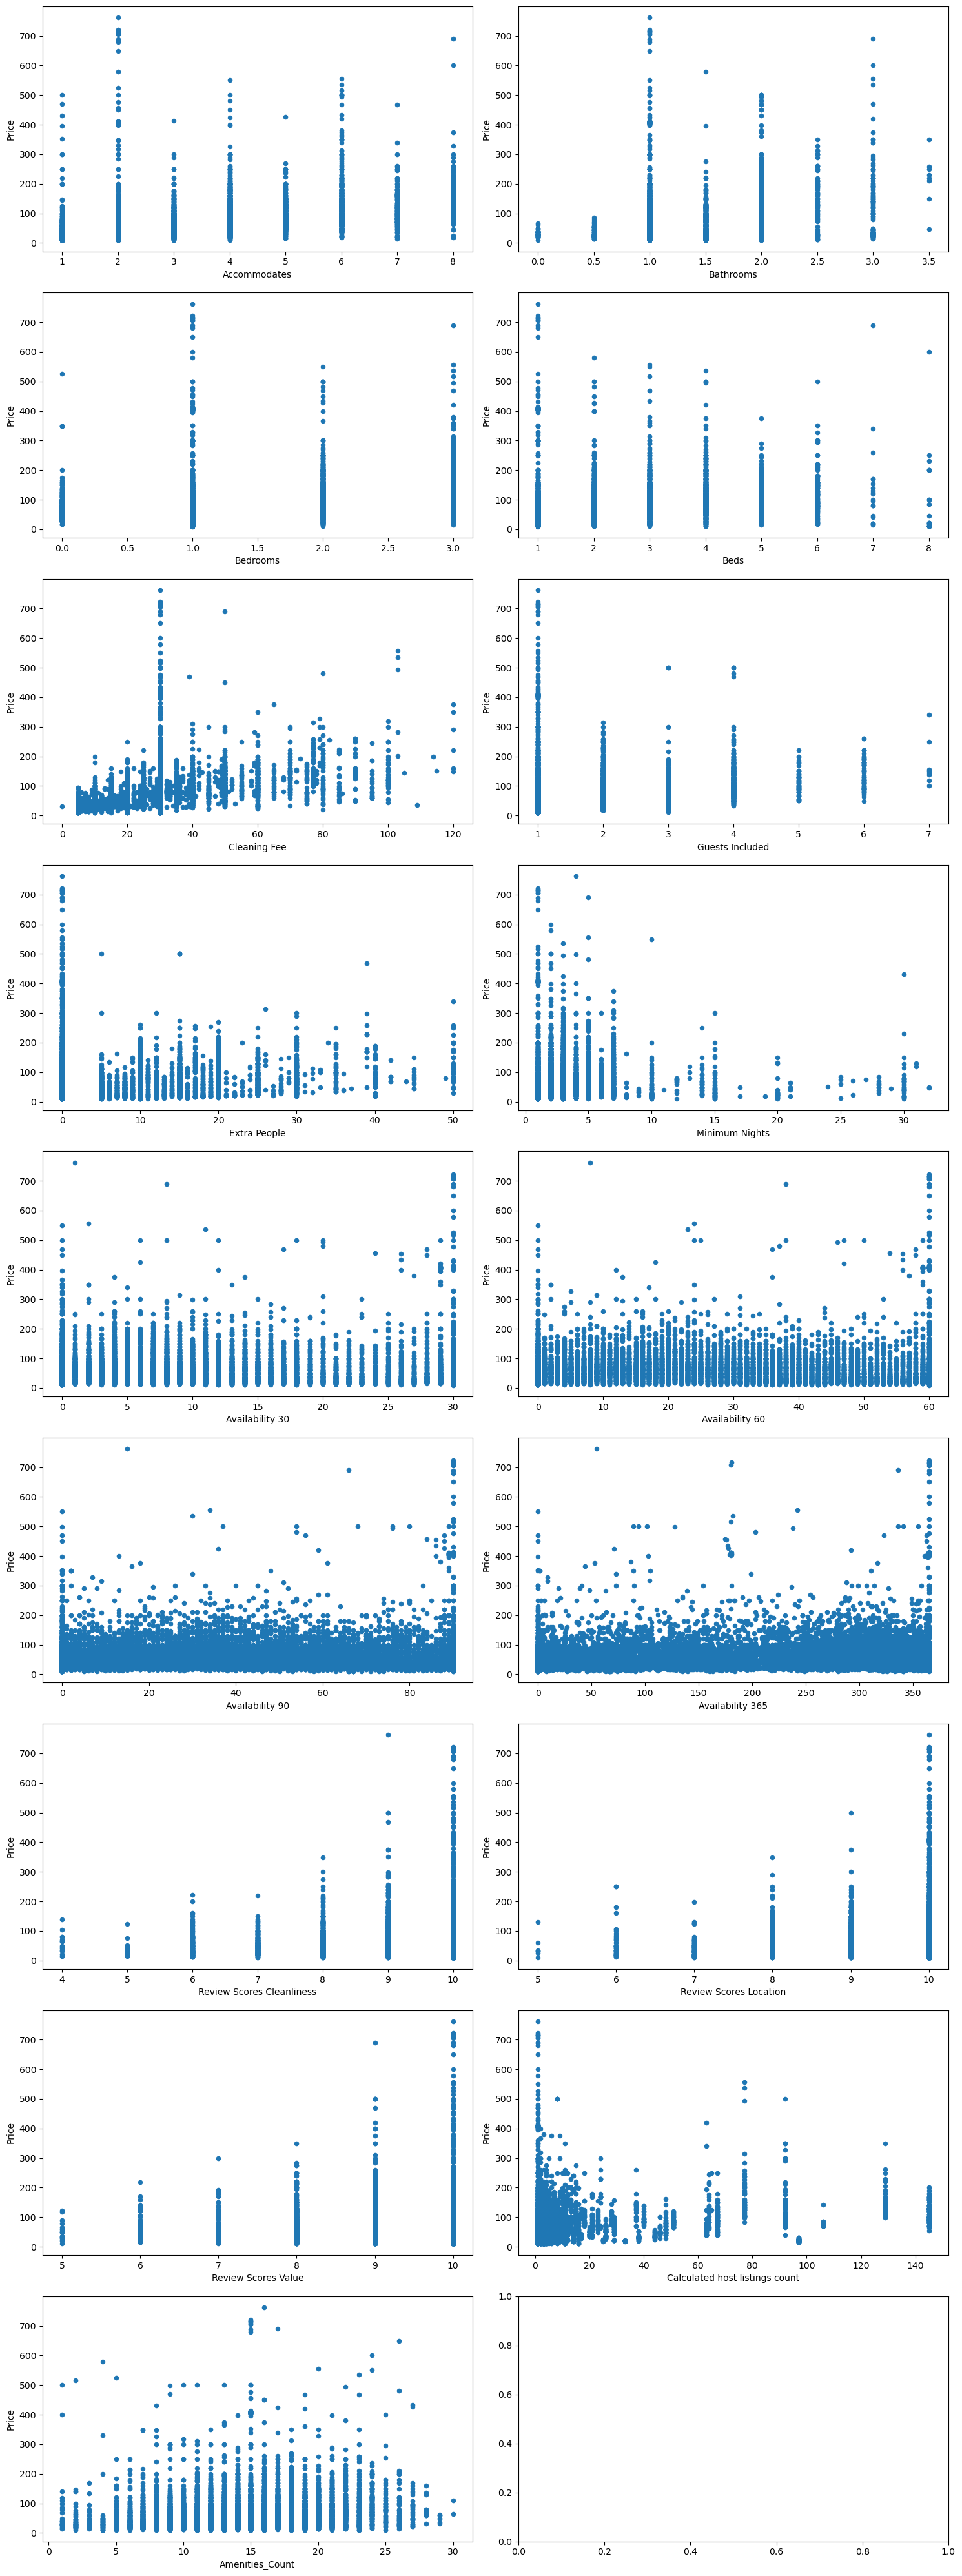

In [693]:

variables = ['Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count', 'Amenities_Count']


fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 40))  

axes = axes.flatten()

for i, var in enumerate(variables):
    data.plot(kind='scatter', x=var, y='Price', ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')

plt.tight_layout()

plt.show()


## Modelado

In [799]:
### DATOS TRAIN

# Cargar los datos
data_train = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')
data_test = pd.read_csv('./airbnb_test.csv', sep=';', decimal='.')

# Añadimos una columna 'is_train' para identificar más tarde
data_train['is_train'] = 1
data_test['is_train'] = 0

# Concatenar ambos datasets para procesar de manera uniforme
data_combined = pd.concat([data_train, data_test], axis=0)

# Eliminar columna Geolocation de ambos
data_combined = data_combined.drop('Geolocation', axis=1)

# CountEncoding
data_combined['Amenities'] = data_combined['Amenities'].str.replace(" ", "").str.lower()
data_combined['Amenities_Count'] = data_combined['Amenities'].str.split(',').apply(lambda x: len(set(x)))
data_combined = data_combined.drop('Amenities', axis=1)

# LabelEncoding
label_encoder = LabelEncoder()
columns_to_encode = [
    'Property Type', 
    'Room Type', 
    'Bed Type', 
    'Experiences Offered', 
    'Cancellation Policy'
]

for column in columns_to_encode:
    # Entrena el LabelEncoder en el conjunto combinado
    label_encoder.fit(data_combined[column].astype(str))
    data_combined[column] = label_encoder.transform(data_combined[column].astype(str))

# TargetEncoding
target_variable = 'Price'
columns_to_target_encode = [
    'Street', 
    'Neighbourhood', 
    'Neighbourhood Cleansed', 
    'Neighbourhood Group Cleansed', 
    'City', 
    'State', 
    'Zipcode', 
    'Market', 
    'Smart Location', 
    'Country Code', 
    'Country'
]

for column in columns_to_target_encode:
    mean_target = data_combined.groupby(column)[target_variable].mean()
    data_combined[column] = data_combined[column].map(mean_target)

# Separar de nuevo en data_train y data_test después de codificar
data_train = data_combined[data_combined['is_train'] == 1].drop('is_train', axis=1)
data_test = data_combined[data_combined['is_train'] == 0].drop('is_train', axis=1)

#Test ANOVA y eliminación variables
from sklearn.feature_selection import f_classif
import pandas as pd
X = data_train.drop('Price', axis=1) 
y = data_train['Price']  
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})
significant_features = anova_results[anova_results['P-Value'] < 0.05]
non_significant_features = anova_results[anova_results['P-Value'] >= 0.05]
variables_to_remove = non_significant_features['Feature'].tolist()
num_variables_to_remove = len(variables_to_remove)
data_train = data_train.drop(columns=variables_to_remove, errors='ignore')  

#Eliminación variables por características irrelevantes
data_train = data_train.drop(['Experiences Offered', 'Country', 'Country Code'], axis=1)

#Eliminación variables con baja correlación
variables_to_remove = [
    'Room Type',
    'Number of Reviews',
    'Reviews per Month',
    'Review Scores Rating',
    'Review Scores Accuracy',
    'Review Scores Communication',
    'Review Scores Checkin',
    'Neighbourhood', 
    'Neighbourhood Group Cleansed',
    'Property Type',
    'Cancellation Policy']
data_train = data_train.drop(columns=variables_to_remove)

#Regularización Outliers
data_train = data_train[data_train['Accommodates'] <= 8.5]
data_train = data_train[data_train['Bathrooms'] <= 5]
data_train = data_train[data_train['Bedrooms'] <= 3.5]
data_train = data_train[data_train['Beds'] <= 8]
data_train = data_train[data_train['Cleaning Fee'] <= 200]
data_train = data_train[data_train['Guests Included'] <= 7]
data_train = data_train[data_train['Extra People'] <= 60]
data_train = data_train[data_train['Minimum Nights'] <= 200]
data_train = data_train[data_train['Review Scores Cleanliness'] >= 4]
data_train = data_train[data_train['Review Scores Location'] >= 5]
data_train = data_train[data_train['Review Scores Value'] >= 5]
data_train = data_train[data_train['Amenities_Count'] <= 30]



In [ ]:
### DATOS TEST

# Cargar los datos
data_train = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')
data_test = pd.read_csv('./airbnb_test.csv', sep=';', decimal='.')

# Añadimos una columna 'is_train' para identificar más tarde
data_train['is_train'] = 1
data_test['is_train'] = 0

# Concatenar ambos datasets para procesar de manera uniforme
data_combined = pd.concat([data_train, data_test], axis=0)

# Eliminar columna Geolocation de ambos
data_combined = data_combined.drop('Geolocation', axis=1)

# CountEncoding
data_combined['Amenities'] = data_combined['Amenities'].str.replace(" ", "").str.lower()
data_combined['Amenities_Count'] = data_combined['Amenities'].str.split(',').apply(lambda x: len(set(x)))
data_combined = data_combined.drop('Amenities', axis=1)

# LabelEncoding
label_encoder = LabelEncoder()
columns_to_encode = [
    'Property Type', 
    'Room Type', 
    'Bed Type', 
    'Experiences Offered', 
    'Cancellation Policy'
]

for column in columns_to_encode:
    # Entrena el LabelEncoder en el conjunto combinado
    label_encoder.fit(data_combined[column].astype(str))
    data_combined[column] = label_encoder.transform(data_combined[column].astype(str))

# TargetEncoding
target_variable = 'Price'
columns_to_target_encode = [
    'Street', 
    'Neighbourhood', 
    'Neighbourhood Cleansed', 
    'Neighbourhood Group Cleansed', 
    'City', 
    'State', 
    'Zipcode', 
    'Market', 
    'Smart Location', 
    'Country Code', 
    'Country'
]

for column in columns_to_target_encode:
    mean_target = data_combined.groupby(column)[target_variable].mean()
    data_combined[column] = data_combined[column].map(mean_target)

# Separar de nuevo en data_train y data_test después de codificar
data_train = data_combined[data_combined['is_train'] == 1].drop('is_train', axis=1)
data_test = data_combined[data_combined['is_train'] == 0].drop('is_train', axis=1)

#Test ANOVA y eliminación variables
from sklearn.feature_selection import f_classif
import pandas as pd
X = data_test.drop('Price', axis=1) 
y = data_test['Price']  
f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})
significant_features = anova_results[anova_results['P-Value'] < 0.05]
non_significant_features = anova_results[anova_results['P-Value'] >= 0.05]
variables_to_remove = non_significant_features['Feature'].tolist()
num_variables_to_remove = len(variables_to_remove)
data_test = data_test.drop(columns=variables_to_remove, errors='ignore')  

#Eliminación variables por características irrelevantes
data_test = data_test.drop(['Experiences Offered', 'Country', 'Country Code'], axis=1)

#Eliminación variables con baja correlación
variables_to_remove = [
    'Room Type',
    'Number of Reviews',
    'Reviews per Month',
    'Review Scores Rating',
    'Review Scores Accuracy',
    'Review Scores Communication',
    'Review Scores Checkin',
    'Neighbourhood', 
    'Neighbourhood Group Cleansed',
    'Property Type',
    'Cancellation Policy']
data_test = data_test.drop(columns=variables_to_remove)

#Regularización Outliers
data_test = data_test[data_test['Accommodates'] <= 8.5]
data_test = data_test[data_test['Bathrooms'] <= 5]
data_test = data_test[data_test['Bedrooms'] <= 3.5]
data_test = data_test[data_test['Beds'] <= 8]
data_test = data_test[data_test['Cleaning Fee'] <= 200]
data_test = data_test[data_test['Guests Included'] <= 7]
data_test = data_test[data_test['Extra People'] <= 60]
data_test = data_test[data_test['Minimum Nights'] <= 200]
data_test = data_test[data_test['Review Scores Cleanliness'] >= 4]
data_test = data_test[data_test['Review Scores Location'] >= 5]
data_test = data_test[data_test['Review Scores Value'] >= 5]
data_test = data_test[data_test['Amenities_Count'] <= 30]



In [815]:
data_train.head(2)

Street  Neighbourhood Cleansed       City      State    Zipcode  \
0  121.25641              103.722222  66.033301  66.446364  83.401264   
1   59.61236               85.497877  66.033301  66.446364  68.998444   

      Market  Smart Location   Latitude  Longitude  Accommodates  ...  \
0  67.477534       65.890632  40.407732  -3.684819             4  ...   
1  67.477534       65.890632  40.415802  -3.705340             4  ...   

   Minimum Nights  Availability 30  Availability 60  Availability 90  \
0               2                9               32               52   
1               1               15               39               64   

   Availability 365  Review Scores Cleanliness  Review Scores Location  \
0               117                       10.0                    10.0   
1               208                        9.0                    10.0   

   Review Scores Value  Calculated host listings count  Amenities_Count  
0                  9.0                             2.0               13  
1                 10.0                             1.0               18  

[2 rows x 27 columns]

In [813]:
data_test.head(2)

Street  Neighbourhood Cleansed       City      State    Zipcode  \
0  28.533333               24.266667  66.033301  66.446364  28.918033   
1  88.718615               78.018450  66.033301  66.446364  82.657507   

      Market  Smart Location   Latitude  Longitude  Accommodates  ...  \
0  67.477534       65.890632  40.346320  -3.691440             1  ...   
1  67.477534       65.890632  40.414423  -3.712847             1  ...   

   Minimum Nights  Availability 30  Availability 60  Availability 90  \
0               1                7               16               46   
1               3                0                5               35   

   Availability 365  Review Scores Cleanliness  Review Scores Location  \
0                46                       10.0                     9.0   
1               310                       10.0                    10.0   

   Review Scores Value  Calculated host listings count  Amenities_Count  
0                 10.0                             1.0               14  
1                 10.0                             3.0               17  

[2 rows x 27 columns]

In [811]:
train_columns = set(data_train.columns)

test_columns = set(data_test.columns)

extra_in_test = test_columns - train_columns
print(f"Columnas en test pero no en train: {extra_in_test}")

extra_in_train = train_columns - test_columns
print(f"Columnas en train pero no en test: {extra_in_train}")


Columnas en test pero no en train: set()
Columnas en train pero no en test: set()


In [807]:
data_test = data_test.drop(['Country', 'Reviews per Month', 'Property Type', 'Review Scores Communication', 
                            'Number of Reviews', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy', 
                            'Maximum Nights', 'Country Code', 'Cancellation Policy', 'Experiences Offered', 
                            'Review Scores Rating', 'Neighbourhood', 'Bed Type', 'Review Scores Checkin', 
                            'Room Type'], axis=1)

In [809]:
# Ver columnas en train
train_columns = set(data_train.columns)

# Ver columnas en test
test_columns = set(data_test.columns)

# Mostrar las columnas que están en test pero no en train
extra_in_test = test_columns - train_columns
print(f"Columnas en test pero no en train: {extra_in_test}")

# Mostrar las columnas que están en train pero no en test
extra_in_train = train_columns - test_columns
print(f"Columnas en train pero no en test: {extra_in_train}")


Columnas en test pero no en train: set()
Columnas en train pero no en test: set()


Se que es una chapuza grande, pero no he encontrado otra manera de solucionar ni el porqué me esta fallando el modelado de datos de train.

In [818]:
from sklearn import preprocessing

# Dataset de train
data_train = data_train
y_train = data_train['Price'].values     # nos quedamos con la 1ª columna, price
X_train = data_train.drop(columns=['Price']).values     # nos quedamos con el resto

# Dataset de test
data_test = data_test
y_test = data_test['Price'].values     # nos quedamos con la 1ª columna, price
X_test = data_test.drop(columns=['Price']).values    # nos quedamos con el resto

In [820]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [822]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11234, 26)
Datos test:  (2956, 26)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

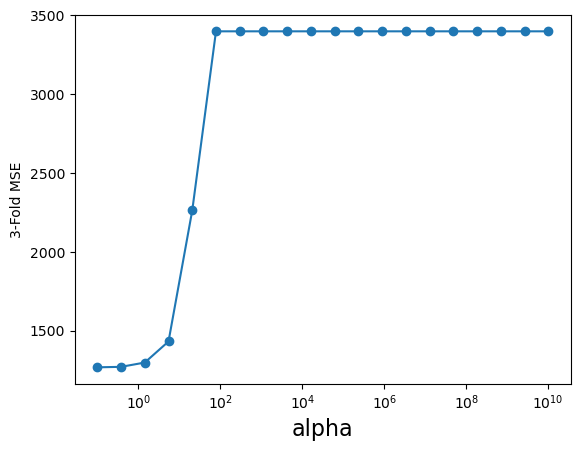

In [826]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [828]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = data_train.drop(columns=['Price']).columns # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.26e+03
MSE Modelo Lasso (test) : 1.67e+03
RMSE Modelo Lasso (train): 35.4
RMSE Modelo Lasso (test) : 40.8
Street 28.29640129144405
Neighbourhood Cleansed -0.3718813316761905
City 0.0
State -0.7001639505706995
Zipcode -0.4384419416048886
Market -5.356003221470651
Smart Location 9.356645931345609
Latitude -0.14502035362627766
Longitude -0.2075902638584685
Accommodates 17.05173587334333
Bathrooms 2.2086137116033817
Bedrooms 4.201263114346648
Beds -0.8938445508034846
Cleaning Fee 10.827042239849142
Guests Included 1.2591530239023307
Extra People -3.8802796043097323
Minimum Nights 0.0
Availability 30 5.798682437964947
Availability 60 0.0
Availability 90 -1.7869936668443542
Availability 365 -0.04338492653028761
Review Scores Cleanliness 2.521685817246667
Review Scores Location 0.8850584633232023
Review Scores Value 0.8684339002483985
Calculated host listings count -0.6508816543829955
Amenities_Count 2.5591820712735522


In [830]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostramos el MSE promedio
print(f"Linear Regression MSE: {-scores.mean()}")


Linear Regression MSE: 1269.6105613347613


In [832]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Random Forest MSE: {-rf_scores.mean()}")


Random Forest MSE: 1123.0667332056396


In [834]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Gradient Boosting MSE: {-gb_scores.mean()}")


Gradient Boosting MSE: 1096.1136383784756


## Análisis final: 

El objetivo era encontrar el mejor modelo para predecir los precios de Airbnbs, probé distintos modelos de predicción:
* Lasso Regression
* Regresión Lineal
* Random Forest
* Gradient Boosting

1. Lasso Regression: tuvo un MSE de 1670 en el conjunto de prueba. El valor es más alto que el de otros modelos lo que sugiere que Lasso no fue capaz de predecir bien los precios. Es útil porque elimina algunas variables menos importantes pero en este caso, parece que eliminó demasiado o no capturó bien relaciones entre datos.
2. Regresión Lineal: tuvo un MSE cercano a Lasso 1269, es ligeramente mejor pero sigue siendo peor que los modelos de árboles. Asume que la relación entre las variables y el precio es lineal.
3. Random Forest: MSE de 1123, significativamente mejor que Lasso y Regresión Lineal. Es capaz de capturar relaciones más complejas entre las variables por lo que predice de forma más precisa.
4. Gradient Boosting: tuvo el mejor rendimiento con un MSE de 1096. Es el modelo más preciso de los que probamos, lo que indica que es el mejor para predecir los precios basandose en este conjunto de datos.

   
